In [87]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)


In [88]:
print (len(X_train))
print (len(X_test))

7500
2500


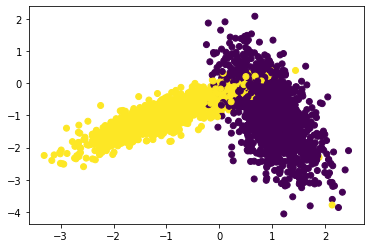

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [93]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import random

# return a list of indecies with start s and end e
def get_cvblock(s, e, i=1):
   return list(range(s, e, i))

# generate 10 unique values(uniform random distribution) in the given range
def random_params(params_range):
    sort_values = random.sample(range(1, params_range),10)
    sort_values.sort()
    return sort_values

def RandomSearchCV(x_train, y_train, classifier, params_range, folds):
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params"
    params_list= random_params(params_range)
    print(params_list)

    params = {'n_neighbors': params_list}

    #2.devide numbers ranging from  0 to len(X_train) into groups = folds ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
    # group 1: 0-33, group 2:34-66, group 3: 67-100
    groups = len(x_train)//folds
    trainscores = []
    cvscores  = []    
    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        cvscores_folds  = []
        ind = 0
        for j in range(0, folds):
            # select k blocks one by one as cv dataset and reamining as train dataset 
            cv_indices = get_cvblock(ind, ind + groups)
            train_indices = list(set(list(range(1, len(x_train)))) - set(cv_indices))
            ind = ind + groups

            # selecting the data points based on the train_indices and cv_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_cv  = x_train[cv_indices]
            Y_cv  = y_train[cv_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train, Y_train)
        
            Y_predicted = classifier.predict(X_cv)
            cvscores_folds.append(accuracy_score(Y_cv, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
            
        trainscores.append(np.mean(np.array(trainscores_folds)))
        cvscores.append(np.mean(np.array(cvscores_folds)))
    return trainscores, cvscores, params

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
folds = 3
params_range = 50
trainscores, cvscores, params = RandomSearchCV(X_train, y_train, neigh, params_range, folds)
 

  0%|          | 0/10 [00:00<?, ?it/s]

[1, 3, 5, 16, 19, 21, 31, 37, 39, 40]


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


{'n_neighbors': [1, 3, 5, 16, 19, 21, 31, 37, 39, 40]}
[1.0, 0.967995599119824, 0.9624616123224644, 0.9579276922051078, 0.9571275855171034, 0.9572609321864373, 0.9574608921784357, 0.9579276655331066, 0.9579276788691072, 0.9585944522237781]
[0.9296000000000001, 0.9464, 0.9495999999999999, 0.9548, 0.9541333333333334, 0.9541333333333334, 0.9553333333333334, 0.9556, 0.9556, 0.956]


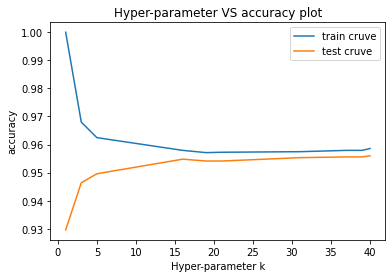

In [98]:
print(params)
print(trainscores)
print(cvscores)
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],cvscores, label='test cruve')
plt.xlabel('Hyper-parameter k')
plt.ylabel('accuracy')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

Summary: We will select the value of k where we are getting maximum accuracy in train and test data which is 40

In [99]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

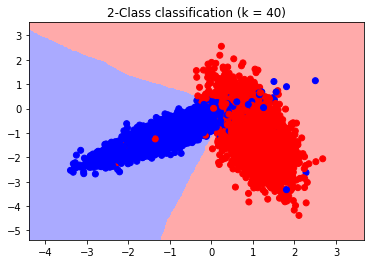

In [103]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 40)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)